In [70]:
import json
import seaborn 
import seaborn as sns
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVR
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder,KBinsDiscretizer
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score,KFold,cross_val_predict
from sklearn.metrics import r2_score,mean_squared_error,roc_curve,confusion_matrix,accuracy_score

In [94]:
df = pd.read_json(path_or_buf = 'predictionQuery_MHD2_withoutDelete.json', orient='records')
df = pd.DataFrame(data=df)
#df = pd.read_csv('predictionQuery_MHD.csv')
df.head(50)

,lon,lat,ROUTE_NUMBER,DIRECTION,BUS_STOP_ORDER_NUM,BUS_STOP_NUM_1,Current_Stop,BUS_STOP_SUB_NUM_2,BUS_STOP_NUM_2,Next_Stop,PLANNED_ROAD,REAL_ROAD,DELAY,VEHICLE_NUMBER,Current_Time,Current_Day,Current_Hour,Current_Minutes,Current_Seconds
0,21.25039,48.98166,1,P,12,35,Železničná stanica,1,529,Škára,850,154,-48,735,2021-03-09 10:14:44.354,9,11,14,44
1,21.24213,48.99564,2,T,6,205,Divadlo Jonáša Záborského,0,2,Na Hlavnej,290,290,-13,734,2021-03-09 10:14:44.354,9,11,14,44
2,21.22315,49.01565,38,T,17,190,VUKOV,0,191,Centrum,730,557,13,746,2021-03-09 10:14:44.354,9,11,14,44
3,21.26354,48.98381,38,T,4,39,Martina Benku,0,38,Pavla Horova,370,370,-4,724,2021-03-09 10:15:29.382,9,11,15,29
4,21.28670,49.05149,21,T,3,91,V kopci,1,90,Nám. J.Kolarčíka,490,490,-57,370,2021-03-09 10:15:29.382,9,11,15,29
5,21.24170,48.99604,8,P,9,1,Trojica,1,2,Na Hlavnej,394,394,-4,723,2021-03-09 10:15:29.382,9,11,15,29
6,21.22235,49.01223,4,P,3,191,Centrum,1,190,VUKOV,517,517,-4,728,2021-03-09 10:15:29.382,9,11,15,29
7,21.19808,48.99278,18,P,4,168,Kvašná voda,1,167,Vydumanec,560,560,40,364,2021-03-09 10:15:44.382,9,11,15,44
8,21.25255,48.98319,46,T,10,529,Škára,0,35,Železničná stanica,850,262,-30,394,2021-03-09 10:15:44.382,9,11,15,44
9,21.23602,48.99727,29,P,7,157,Levočská,0,532,Floriánova,1200,1200,-36,393,2021-03-09 10:15:59.385,9,11,15,59


In [95]:
df.describe()

,lon,lat,BUS_STOP_ORDER_NUM,BUS_STOP_NUM_1,BUS_STOP_SUB_NUM_2,BUS_STOP_NUM_2,PLANNED_ROAD,REAL_ROAD,DELAY,VEHICLE_NUMBER,Current_Day,Current_Hour,Current_Minutes,Current_Seconds
count,20863.000000,20863.000000,20863.000000,20863.000000,20863.000000,20863.000000,20863.000000,20863.000000,20863.000000,20863.000000,20863.000000,20863.000000,20863.000000,20863.000000
mean,21.245664,48.997531,8.536500,124.871447,0.548004,119.975219,624.063797,469.432296,-37.496429,535.128074,9.097014,12.438432,29.374682,28.876240
std,0.020491,0.015761,5.490215,145.462938,0.605145,141.935842,541.093415,382.009848,148.780247,224.260066,0.546805,4.469770,16.492934,17.427963
min,21.164730,48.942360,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-8640.000000,345.000000,8.000000,0.000000,0.000000,0.000000
25%,21.235960,48.986650,4.000000,26.000000,0.000000,25.000000,394.000000,284.000000,-77.000000,380.000000,9.000000,9.000000,16.000000,15.000000
50%,21.242980,48.996010,8.000000,79.000000,1.000000,78.000000,517.000000,422.000000,-22.000000,400.000000,9.000000,13.000000,29.000000,30.000000
75%,21.257020,49.003650,12.000000,187.000000,1.000000,180.000000,716.000000,590.000000,19.000000,731.000000,9.000000,15.000000,43.000000,45.000000
max,21.333700,49.065900,32.000000,557.000000,4.000000,557.000000,8500.000000,8370.000000,2069.000000,3433.000000,10.000000,23.000000,59.000000,59.000000


In [96]:
df.isnull().sum()

lon                   0
lat                   0
ROUTE_NUMBER          0
DIRECTION             0
BUS_STOP_ORDER_NUM    0
BUS_STOP_NUM_1        0
Current_Stop          0
BUS_STOP_SUB_NUM_2    0
BUS_STOP_NUM_2        0
Next_Stop             0
PLANNED_ROAD          0
REAL_ROAD             0
DELAY                 0
VEHICLE_NUMBER        0
Current_Time          0
Current_Day           0
Current_Hour          0
Current_Minutes       0
Current_Seconds       0
dtype: int64

In [97]:
df.dtypes

lon                          float64
lat                          float64
ROUTE_NUMBER                  object
DIRECTION                     object
BUS_STOP_ORDER_NUM             int64
BUS_STOP_NUM_1                 int64
Current_Stop                  object
BUS_STOP_SUB_NUM_2             int64
BUS_STOP_NUM_2                 int64
Next_Stop                     object
PLANNED_ROAD                   int64
REAL_ROAD                      int64
DELAY                          int64
VEHICLE_NUMBER                 int64
Current_Time          datetime64[ns]
Current_Day                    int64
Current_Hour                   int64
Current_Minutes                int64
Current_Seconds                int64
dtype: object

In [98]:
#def f(x):
#    if(x == 'T'):
#        return 0
#    elif(x == 'P'):
#        return 1
#    elif(x == 'D'):
#        return 2
#    elif(x == 'Z'):
#        return 3
#    elif(x == 'R'):
#        return 4

#df['DIRECTION'] = [f(x) for x in df['DIRECTION']]
#df['DIRECTION']

In [99]:
corr = df.corr()#Lists all pairs of highly collinear variables
indices = np.where(corr > 0.3)
indices = [(corr.columns[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices

[('PLANNED_ROAD', 'REAL_ROAD')]

In [100]:
corr = df.corr()#Lists all pairs of highly collinear variables
indices = np.where(corr < -0.3)
indices = [(corr.columns[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices

[]

In [101]:
df = df.drop(['BUS_STOP_ORDER_NUM',
              'PLANNED_ROAD','REAL_ROAD','BUS_STOP_NUM_1','BUS_STOP_SUB_NUM_2',
              'Next_Stop','BUS_STOP_NUM_2','Current_Time'
              ],axis =1, errors='ignore')


In [102]:
df.head(5)

,lon,lat,ROUTE_NUMBER,DIRECTION,Current_Stop,DELAY,VEHICLE_NUMBER,Current_Day,Current_Hour,Current_Minutes,Current_Seconds
0,21.25039,48.98166,1,P,Železničná stanica,-48,735,9,11,14,44
1,21.24213,48.99564,2,T,Divadlo Jonáša Záborského,-13,734,9,11,14,44
2,21.22315,49.01565,38,T,VUKOV,13,746,9,11,14,44
3,21.26354,48.98381,38,T,Martina Benku,-4,724,9,11,15,29
4,21.28670,49.05149,21,T,V kopci,-57,370,9,11,15,29


In [103]:
def toString(x):
    return str(x)
    
df['ROUTE_NUMBER'] = [toString(x) for x in df['ROUTE_NUMBER']]

In [104]:
df['ROUTE_NUMBER'] 

0         1
1         2
2        38
3        38
4        21
         ..
20858    22
20859    15
20860    18
20861    5D
20862     4
Name: ROUTE_NUMBER, Length: 20863, dtype: object

<AxesSubplot:>

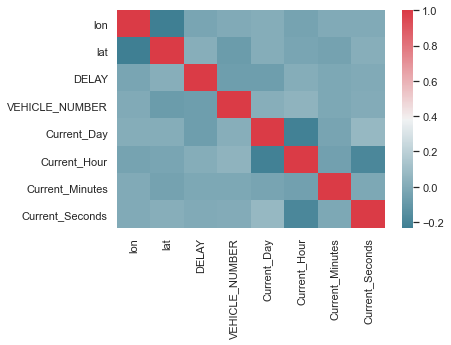

In [105]:
seaborn.set(style='white')
cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
seaborn.heatmap(df.corr(),cmap=cmap)

In [106]:
df.isnull().sum()

lon                0
lat                0
ROUTE_NUMBER       0
DIRECTION          0
Current_Stop       0
DELAY              0
VEHICLE_NUMBER     0
Current_Day        0
Current_Hour       0
Current_Minutes    0
Current_Seconds    0
dtype: int64

In [107]:
def LabelEncoding(col):
    encoder = LabelEncoder()
    encoder.fit(df[col])
    list(encoder.classes_)
    return encoder.transform(df[col])

def KBinsDiscretizing(currCol):
    discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
    discretizer.fit(df[currCol])
    return discretizer.transform(df[currCol])

df['Current_Stop_Encoded']=LabelEncoding('Current_Stop')
df['lon_Encoded']=LabelEncoding('lon')
df['lat_Encoded']=LabelEncoding('lat')
df['Current_Seconds_Encoded']=LabelEncoding('Current_Seconds')
df['Current_Minutes_Encoded']=LabelEncoding('Current_Minutes')
df['Current_Hour_Encoded']= LabelEncoding('Current_Hour')
df['Current_Day_Encoded']= LabelEncoding('Current_Day')
df['DIRECTION_Encoded']= LabelEncoding('DIRECTION')
df['RouteNumber_Encoded'] = LabelEncoding('ROUTE_NUMBER')

In [108]:
df.head(5)

,lon,lat,ROUTE_NUMBER,DIRECTION,Current_Stop,DELAY,VEHICLE_NUMBER,Current_Day,Current_Hour,Current_Minutes,Current_Seconds,Current_Stop_Encoded,lon_Encoded,lat_Encoded,Current_Seconds_Encoded,Current_Minutes_Encoded,Current_Hour_Encoded,Current_Day_Encoded,DIRECTION_Encoded,RouteNumber_Encoded
0,21.25039,48.98166,1,P,Železničná stanica,-48,735,9,11,14,44,245,1946,535,42,14,10,1,2,2
1,21.24213,48.99564,2,T,Divadlo Jonáša Záborského,-13,734,9,11,14,44,19,1427,1270,42,14,10,1,4,12
2,21.22315,49.01565,38,T,VUKOV,13,746,9,11,14,44,195,542,2127,42,14,10,1,4,29
3,21.26354,48.98381,38,T,Martina Benku,-4,724,9,11,15,29,89,2382,659,28,15,10,1,4,29
4,21.28670,49.05149,21,T,V kopci,-57,370,9,11,15,29,194,3209,2767,28,15,10,1,4,13


In [109]:
df = df.drop(['Current_Stop','Current_Hour','Current_Minutes',
              'Current_Seconds','lon','lat',
              'PLANNED_ROAD','REAL_ROAD',
              'Current_Time','DIRECTION','ROUTE_NUMBER',
              'Current_Day'],axis =1, errors='ignore')

In [110]:
df.head(5)

,DELAY,VEHICLE_NUMBER,Current_Stop_Encoded,lon_Encoded,lat_Encoded,Current_Seconds_Encoded,Current_Minutes_Encoded,Current_Hour_Encoded,Current_Day_Encoded,DIRECTION_Encoded,RouteNumber_Encoded
0,-48,735,245,1946,535,42,14,10,1,2,2
1,-13,734,19,1427,1270,42,14,10,1,4,12
2,13,746,195,542,2127,42,14,10,1,4,29
3,-4,724,89,2382,659,28,15,10,1,4,29
4,-57,370,194,3209,2767,28,15,10,1,4,13


In [111]:
corr = df.corr()#Lists all pairs of highly collinear variables
indices = np.where(corr > 0.3)
indices = [(corr.columns[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices

[]

In [112]:
corr = df.corr()#Lists all pairs of highly collinear variables
indices = np.where(corr < -0.3)
indices = [(corr.columns[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices

[]

In [113]:
df = df.drop(['lon_Encoded','Current_Day_Encoded'],axis =1, errors='ignore')

,DELAY,VEHICLE_NUMBER,Current_Stop_Encoded,lat_Encoded,Current_Seconds_Encoded,Current_Minutes_Encoded,Current_Hour_Encoded,DIRECTION_Encoded,RouteNumber_Encoded
0,-48,735,245,535,42,14,10,2,2
1,-13,734,19,1270,42,14,10,4,12
2,13,746,195,2127,42,14,10,4,29
3,-4,724,89,659,28,15,10,4,29
4,-57,370,194,2767,28,15,10,4,13
5,-4,723,192,1282,28,15,10,2,41
6,-4,728,10,1996,28,15,10,2,31
7,40,364,74,1082,42,15,10,2,10
8,-30,394,241,617,42,15,10,4,37
9,-36,393,83,1374,57,15,10,2,20


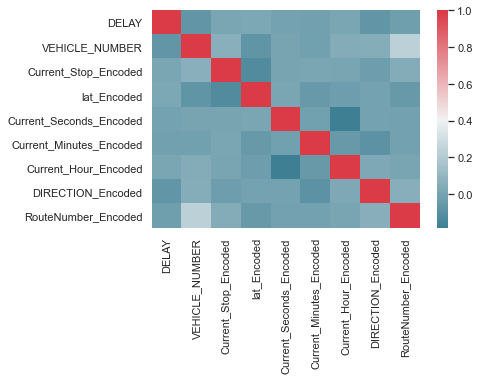

In [114]:
seaborn.heatmap(df.corr(),cmap=cmap)
df.head(10)

#### TrainTest Spit

In [115]:
train_x, test_x, train_y, test_y = train_test_split(df.drop('DELAY', axis=1), df['DELAY'], test_size=0.3, random_state=1234)

In [116]:
print(train_x.shape +  test_x.shape)

(14604, 8, 6259, 8)


In [117]:
print(train_y.shape +  test_y.shape)

(14604, 6259)


In [118]:
print(train_x.info()) 
print(test_x.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14604 entries, 4356 to 1318
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   VEHICLE_NUMBER           14604 non-null  int64
 1   Current_Stop_Encoded     14604 non-null  int32
 2   lat_Encoded              14604 non-null  int64
 3   Current_Seconds_Encoded  14604 non-null  int64
 4   Current_Minutes_Encoded  14604 non-null  int64
 5   Current_Hour_Encoded     14604 non-null  int64
 6   DIRECTION_Encoded        14604 non-null  int32
 7   RouteNumber_Encoded      14604 non-null  int32
dtypes: int32(3), int64(5)
memory usage: 855.7 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6259 entries, 13349 to 6079
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   VEHICLE_NUMBER           6259 non-null   int64
 1   Current_Stop_Encoded     6259 non-null   int

### Models

#### GridSearch for RandomForest

In [119]:
startTimeGS = datetime.now()
param_grid = {'n_estimators': [10,15,20,25,100,500,600,700,800,900,1000]}

grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=10)
grid_rf.fit(train_x, train_y)
bestModel = grid_rf.best_estimator_
bestParameters = grid_rf.best_params_
gridScores = grid_rf.score
print('Random forest Grid Search with non-redundant variables took [', datetime.now() - startTimeGS, '] seconds.')

Random forest Grid Search with non-redundant variables took [ 1:51:06.693871 ] seconds.


In [120]:
print(bestModel)
print(bestParameters)
gridScores

RandomForestRegressor()
{'n_estimators': 100}


<bound method BaseSearchCV.score of GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [10, 15, 20, 25, 100, 500, 600, 700,
                                          800, 900, 1000]})>

In [121]:
regr = RandomForestRegressor(n_estimators = bestParameters.get('n_estimators'),
                             random_state = 1234)
regr.fit(train_x, train_y)
folds = KFold(n_splits = 10, shuffle = True, random_state = 1234)
scores = cross_val_score(regr, df.drop('DELAY', axis=1), df['DELAY'], cv=folds,scoring='r2')
y_pred = cross_val_predict(regr, df.drop('DELAY', axis=1), df['DELAY'], cv=folds)
print(scores.mean())
print(scores.std())
print(scores)


y_pred_Random_Forrest = regr.predict(test_x)
regr.score(test_x,test_y)

0.6630789639267574
0.20853319603746615
[0.81116677 0.63412438 0.72189683 0.25388421 0.77893439 0.84793357
 0.77768332 0.80052341 0.73672258 0.26792018]


0.6089819004217611

In [122]:
y_true=test_y
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, y_pred_Random_Forrest))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, y_pred_Random_Forrest))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_true, y_pred_Random_Forrest, squared=False))
print('Explained Variance Score:', metrics.explained_variance_score(y_true, y_pred_Random_Forrest))
print('Max Error:', metrics.max_error(y_true, y_pred_Random_Forrest))
print('Median Absolute Error:', metrics.median_absolute_error(y_true, y_pred_Random_Forrest))
print('R^2:', metrics.r2_score(y_true, y_pred_Random_Forrest))

Mean Absolute Error (MAE): 38.77581860787133
Mean Squared Error (MSE): 7618.458513973097
Root Mean Squared Error (RMSE): 87.2837815059195
Explained Variance Score: 0.6092983542507077
Max Error: 2043.77
Median Absolute Error: 25.24
R^2: 0.6089819004217611


<AxesSubplot:title={'center':'Residuals'}, xlabel='DELAY', ylabel='DELAY'>

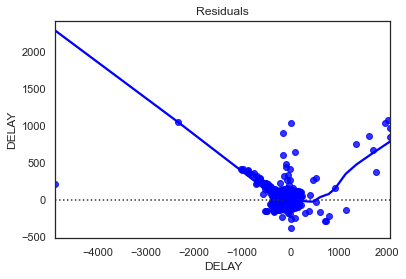

In [123]:
y_pred= y_pred_Random_Forrest
residuals = test_y - y_pred
plt.title('Residuals')
sns.residplot(x=test_y, y=residuals, lowess=True, color="blue")

Text(0.5, 1.0, 'Actual vs predicted')

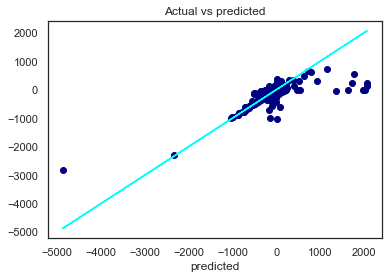

In [124]:
y_pred= regr.predict(test_x)
residuals = test_y - y_pred
plt.scatter(x=test_y, y=y_pred,color = 'navy')
plt.plot(test_y, test_y,color = 'cyan')
plt.xlabel('Actual')
plt.xlabel('predicted')
plt.title('Actual vs predicted')

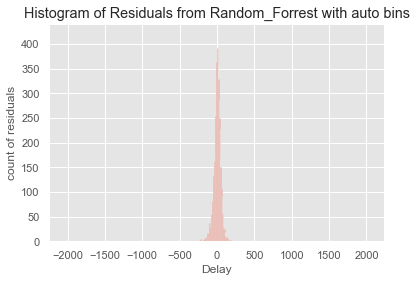

In [125]:
plt.style.use('ggplot')
plt.ylabel('count of residuals')
plt.xlabel('Delay')
plt.hist(residuals, bins='auto')
plt.title("Histogram of Residuals from Random_Forrest with auto bins")
plt.show()

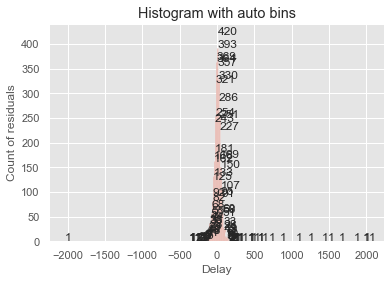

In [126]:
plt.style.use('ggplot')
plt.ylabel('Count of residuals')
plt.xlabel('Delay')
plt.title("Histogram with auto bins")
density, bins, _ = plt.hist(residuals, bins='auto')
count, _ = np.histogram(residuals, bins)
for x,y,num in zip(bins, density, count):
    if num != 0:
        plt.text(x, y+0.05, num, fontsize=12, rotation=0) # x,y,str

#### GridSearch for Linear Regression

In [127]:
param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True,False]}
grid_search = GridSearchCV(LinearRegression(), param_grid, cv = 10)
grid_search.fit(train_x, train_y)

bestModel = grid_search.best_estimator_
bestParameters = grid_search.best_params_
gridScores = grid_search.score
print(bestModel)
print(bestParameters)
gridScores

LinearRegression(fit_intercept=False, normalize=True)
{'copy_X': True, 'fit_intercept': False, 'normalize': True}


<bound method BaseSearchCV.score of GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})>

In [128]:
regressor = LinearRegression(fit_intercept=bestParameters.get('fit_intercept'),
                             normalize=bestParameters.get('normalize'), 
                             copy_X=bestParameters.get('copy_X'))  
regressor.fit(train_x, train_y)
folds = KFold(n_splits = 10, shuffle = True, random_state = 1234)
scores = cross_val_score(regressor, df.drop('DELAY', axis=1), df['DELAY'], cv=folds,scoring='r2')
y_pred = cross_val_predict(regressor, df.drop('DELAY', axis=1), df['DELAY'], cv=folds)
print(scores.mean())
print(scores.std())
print(scores)


y_pred_Linear_Regression = regressor.predict(test_x)
regressor.score(test_x,test_y)

0.009499965947528388
0.0032508610423472935
[0.01440741 0.00824871 0.00698012 0.0070938  0.00952858 0.01446898
 0.01061128 0.00687298 0.00435545 0.01243236]


0.00957373869731315

In [129]:
y_pred= y_pred_Linear_Regression
y_true=test_y
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_true, y_pred, squared=False))
print('Explained Variance Score:', metrics.explained_variance_score(y_true, y_pred))
print('Max Error:', metrics.max_error(y_true, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_true, y_pred))
print('R^2:', metrics.r2_score(y_true, y_pred))

Mean Absolute Error (MAE): 71.45633286626753
Mean Squared Error (MSE): 19297.115379116138
Root Mean Squared Error (RMSE): 138.91405752880496
Explained Variance Score: 0.01029338544605618
Max Error: 4831.711413121301
Median Absolute Error: 51.53166428900414
R^2: 0.00957373869731315


<AxesSubplot:title={'center':'Residuals'}, xlabel='DELAY', ylabel='DELAY'>

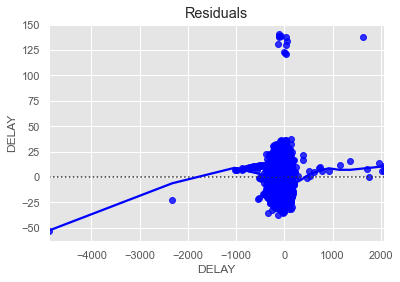

In [130]:
residuals = test_y - y_pred
plt.title('Residuals')
sns.residplot(x=test_y, y=residuals, lowess=True, color="blue")

Text(0.5, 1.0, 'Actual vs predicted')

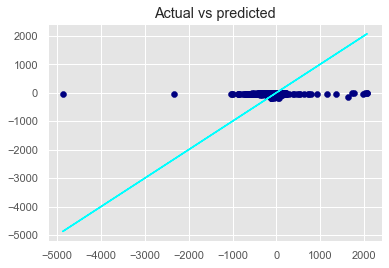

In [131]:
y_pred= regressor.predict(test_x)
residuals = test_y - y_pred
plt.scatter(x=test_y, y=y_pred,color = 'navy')
plt.plot(test_y, test_y,color = 'cyan')
plt.title('Actual vs predicted')

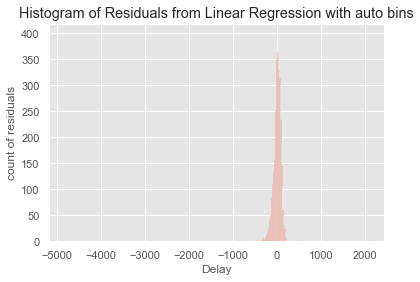

In [132]:
plt.style.use('ggplot')
plt.ylabel('count of residuals')
plt.xlabel('Delay')
plt.hist(residuals, bins='auto')
plt.title("Histogram of Residuals from Linear Regression with auto bins")
plt.show()

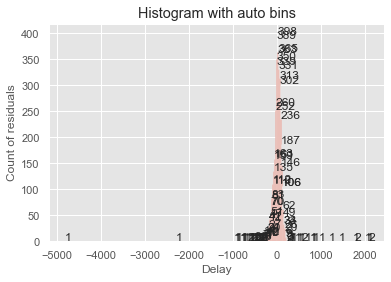

In [133]:
plt.style.use('ggplot')
plt.ylabel('Count of residuals')
plt.xlabel('Delay')
plt.title("Histogram with auto bins")
density, bins, _ = plt.hist(residuals, bins='auto')
count, _ = np.histogram(residuals, bins)
for x,y,num in zip(bins, density, count):
    if num != 0:
        plt.text(x, y+0.05, num, fontsize=12, rotation=0) # x,y,str

#### GridsearchCV for SVR

In [134]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 0.001]}
grid_search = GridSearchCV(SVR(), param_grid, cv = 10)
grid_search.fit(train_x, train_y)

bestModel = grid_search.best_estimator_
bestParameters = grid_search.best_params_
gridScores = grid_search.score
print(bestModel)
print(bestParameters)
gridScores

SVR(C=100, gamma=0.01)
{'C': 100, 'gamma': 0.01}


<bound method BaseSearchCV.score of GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 0.001]})>

#### SVR

In [135]:
svr_rbf = SVR(kernel='rbf', 
              C=bestParameters.get('C'),
              gamma=bestParameters.get('gamma'), epsilon=1)
svr_rbf.fit(train_x, train_y)
folds = KFold(n_splits = 10, shuffle = True, random_state = 1234)
scores = cross_val_score(svr_rbf, df.drop('DELAY', axis=1), df['DELAY'], cv=folds,scoring='r2')
y_pred = cross_val_predict(svr_rbf, df.drop('DELAY', axis=1), df['DELAY'], cv=folds)
print(scores.mean())
print(scores.std())
print(scores)
y_pred_svr = svr_rbf.predict(test_x)
svr_rbf.score(test_x,test_y)

0.19131687094772923
0.08167111519776599
[0.24416637 0.21808751 0.10957697 0.06336933 0.16384166 0.16327625
 0.28226821 0.1042993  0.22621133 0.33807177]


0.15839137081752608

In [136]:
y_pred= y_pred_svr
y_true=test_y
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_true, y_pred, squared=False))
print('Explained Variance Score:', metrics.explained_variance_score(y_true, y_pred))
print('Max Error:', metrics.max_error(y_true, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_true, y_pred))
print('R^2:', metrics.r2_score(y_true, y_pred))

Mean Absolute Error (MAE): 63.28255180286032
Mean Squared Error (MSE): 16397.605208925925
Root Mean Squared Error (RMSE): 128.05313431902368
Explained Variance Score: 0.15855863930548542
Max Error: 4842.906491424741
Median Absolute Error: 45.25481713336541
R^2: 0.15839137081752608


<AxesSubplot:title={'center':'Residuals'}, xlabel='DELAY', ylabel='DELAY'>

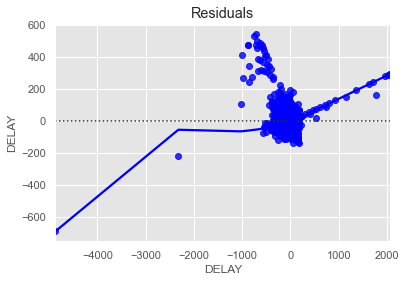

In [137]:
residuals = test_y - y_pred
plt.title('Residuals')
sns.residplot(x=test_y, y=residuals, lowess=True, color="blue")

Text(0.5, 1.0, 'Actual vs predicted')

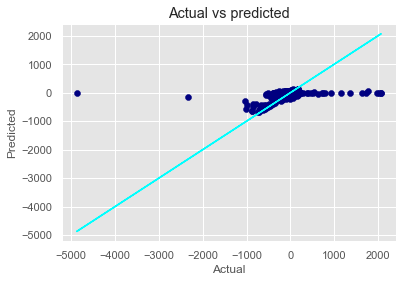

In [138]:
y_pred= svr_rbf.predict(test_x)
residuals = test_y - y_pred
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(x=test_y, y=y_pred,color = 'navy')
plt.plot(test_y, test_y,color = 'cyan')
plt.title('Actual vs predicted')

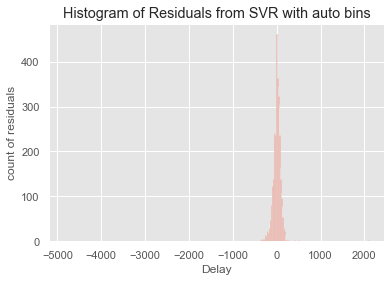

In [139]:
plt.style.use('ggplot')
plt.ylabel('count of residuals')
plt.xlabel('Delay')
plt.hist(residuals, bins='auto')
plt.title("Histogram of Residuals from SVR with auto bins")
plt.show()

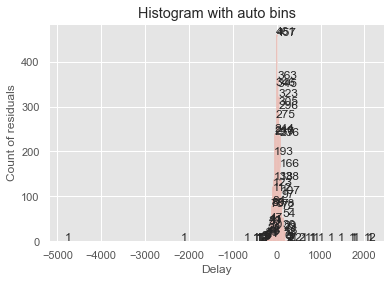

In [140]:
plt.style.use('ggplot')
plt.ylabel('Count of residuals')
plt.xlabel('Delay')
plt.title("Histogram with auto bins")
density, bins, _ = plt.hist(residuals, bins='auto')
count, _ = np.histogram(residuals, bins)
for x,y,num in zip(bins, density, count):
    if num != 0:
        plt.text(x, y+0.05, num, fontsize=12, rotation=0) # x,y,str

#### GridSearch for XGBoost model

In [141]:
param_grid = {'max_depth' : [1,2,3,4,5,6,7,8,9,10],
              'n_estimators': [10,15,20,25,100,500,600,700,800,900,1000]
             }
grid_search = GridSearchCV(xgb.XGBRegressor(objective ='reg:squarederror'), param_grid, cv = 10)
grid_search.fit(train_x, train_y)

bestModel = grid_search.best_estimator_
bestParameters = grid_search.best_params_
gridScores = grid_search.score
print(bestModel)
print(bestParameters)
gridScores

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
{'max_depth': 7, 'n_estimators': 1000}


<bound method BaseSearchCV.score of GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                              

#### XGBoost model

In [142]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                          colsample_bytree = 0.8, 
                          learning_rate = 1,
                          max_depth = bestParameters.get('max_depth'), 
                          alpha = 10, 
                          n_estimators = bestParameters.get('n_estimators'))
xg_reg.fit(train_x,train_y)
folds = KFold(n_splits = 10, shuffle = True, random_state = 1234)
scores= cross_val_score(xg_reg, df.drop('DELAY', axis=1), df['DELAY'], cv=folds,scoring='r2')
y_pred = cross_val_predict(xg_reg, df.drop('DELAY', axis=1), df['DELAY'], cv=folds)
print(scores.mean())
print(scores.std())
print(scores)

preds_y = xg_reg.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, preds_y))
print(xg_reg.score(test_x,test_y))

0.4353841534492934
0.2414057786614438
[ 0.61277042 -0.08351008  0.63554016  0.18804442  0.6634345   0.26064651
  0.42127975  0.70875243  0.57454787  0.37233558]
0.38737643630848806


In [143]:
y_pred= preds_y
y_true=test_y
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_true, y_pred, squared=False))
print('Explained Variance Score:', metrics.explained_variance_score(y_true, y_pred))
print('Max Error:', metrics.max_error(y_true, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_true, y_pred))
print('R^2:', metrics.r2_score(y_true, y_pred))

Mean Absolute Error (MAE): 50.51530350359771
Mean Squared Error (MSE): 11936.141088354578
Root Mean Squared Error (RMSE): 109.25264796953243
Explained Variance Score: 0.3875352289968944
Max Error: 4330.8095703125
Median Absolute Error: 34.422481536865234
R^2: 0.38737643630848806


<AxesSubplot:title={'center':'Residuals'}, xlabel='DELAY', ylabel='DELAY'>

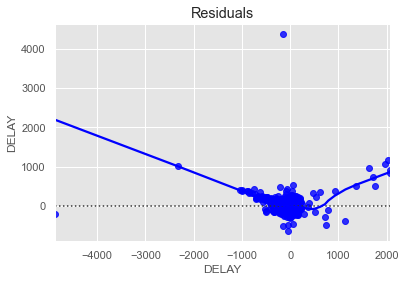

In [144]:
residuals = test_y - y_pred
plt.title('Residuals')
sns.residplot(x=test_y, y=residuals, lowess=True, color="blue")

Text(0.5, 1.0, 'Actual vs predicted')

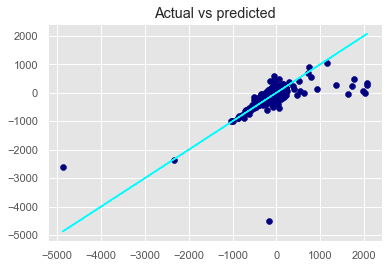

In [145]:
y_pred= xg_reg.predict(test_x)
residuals = test_y - y_pred
plt.scatter(x=test_y, y=y_pred,color = 'navy')
plt.plot(test_y, test_y,color = 'cyan')
plt.title('Actual vs predicted')

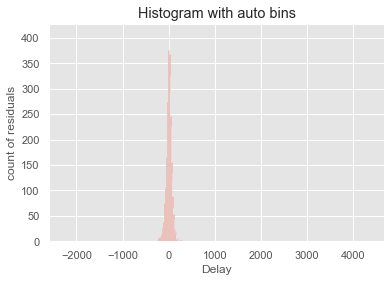

In [146]:
plt.style.use('ggplot')
plt.ylabel('count of residuals')
plt.xlabel('Delay')
plt.hist(residuals, bins='auto')
plt.title("Histogram with auto bins")
plt.show()

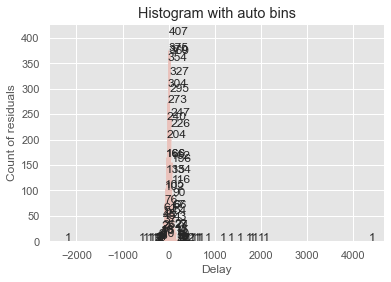

In [147]:
plt.style.use('ggplot')
plt.ylabel('Count of residuals')
plt.xlabel('Delay')
plt.title("Histogram with auto bins")
density, bins, _ = plt.hist(residuals, bins='auto')
count, _ = np.histogram(residuals, bins)
for x,y,num in zip(bins, density, count):
    if num != 0:
        plt.text(x, y+0.05, num, fontsize=12, rotation=0) # x,y,str

#### GridSearch for DecisionTree

In [148]:
startTimeGS = datetime.now()
param_grid = {'criterion':['mse', 'friedman_mse', 'mae'],
              'splitter':['best','random']}

grid_rf = GridSearchCV(DecisionTreeRegressor(random_state =  0), param_grid, cv=10)
grid_rf.fit(train_x, train_y)
bestModel = grid_rf.best_estimator_
bestParameters = grid_rf.best_params_
gridScores = grid_rf.score
print('MLPRegressor Grid Search with non-redundant variables took [', datetime.now() - startTimeGS, '] seconds.')

MLPRegressor Grid Search with non-redundant variables took [ 0:05:48.901721 ] seconds.


In [149]:
print(bestModel)
print(bestParameters)
gridScores

DecisionTreeRegressor(criterion='mae', random_state=0)
{'criterion': 'mae', 'splitter': 'best'}


<bound method BaseSearchCV.score of GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'splitter': ['best', 'random']})>

#### DecisionTree

In [150]:
regr = DecisionTreeRegressor(criterion = bestParameters.get('criterion'),
                             splitter = bestParameters.get('splitter'))
regr.fit(train_x, train_y)
folds = KFold(n_splits = 10, shuffle = True, random_state = 1234)
scores = cross_val_score(regr, df.drop('DELAY', axis=1), df['DELAY'], cv=folds,scoring='r2')
y_pred = cross_val_predict(regr, df.drop('DELAY', axis=1), df['DELAY'], cv=folds)
print(scores.mean())
print(scores.std())
print(scores)


y_pred_svr = regr.predict(test_x)
regr.score(test_x,test_y)

-0.030512176061762396
1.0537569632135106
[ 0.62847251  0.22312728  0.50618977  0.17562923 -2.95973247  0.60434679
  0.58751221 -0.78080973  0.5120316   0.19811104]


0.1645724652795305

In [151]:
y_pred= y_pred_svr
y_true=test_y
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_true, y_pred, squared=False))
print('Explained Variance Score:', metrics.explained_variance_score(y_true, y_pred))
print('Max Error:', metrics.max_error(y_true, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_true, y_pred))
print('R^2:', metrics.r2_score(y_true, y_pred))

Mean Absolute Error (MAE): 61.746924428822496
Mean Squared Error (MSE): 16277.174948074773
Root Mean Squared Error (RMSE): 127.58203223054089
Explained Variance Score: 0.1646833078684805
Max Error: 2324.0
Median Absolute Error: 40.0
R^2: 0.1645724652795305


<AxesSubplot:title={'center':'Residuals'}, xlabel='DELAY', ylabel='DELAY'>

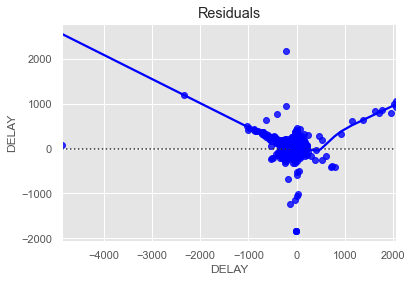

In [152]:
residuals = test_y - y_pred
plt.title('Residuals')
sns.residplot(x=test_y, y=residuals, lowess=True, color="blue")

Text(0.5, 1.0, 'Actual vs predicted')

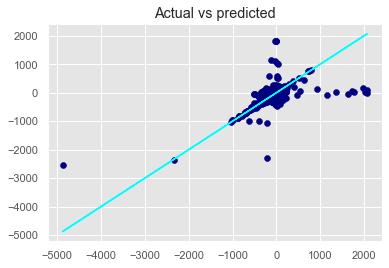

In [153]:
y_pred= regr.predict(test_x)
residuals = test_y - y_pred
plt.scatter(x=test_y, y=y_pred,color = 'navy')
plt.plot(test_y, test_y,color = 'cyan')
plt.title('Actual vs predicted')

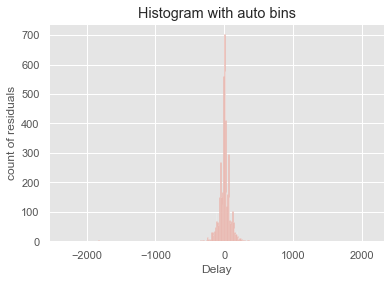

In [154]:
plt.style.use('ggplot')
plt.ylabel('count of residuals')
plt.xlabel('Delay')
plt.hist(residuals, bins='auto')
plt.title("Histogram with auto bins")
plt.show()

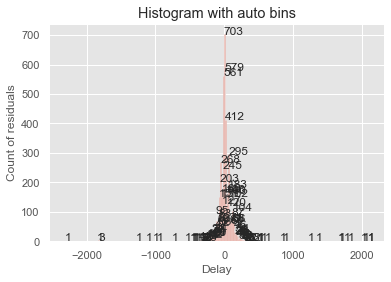

In [155]:
plt.style.use('ggplot')
plt.ylabel('Count of residuals')
plt.xlabel('Delay')
plt.title("Histogram with auto bins")
density, bins, _ = plt.hist(residuals, bins='auto')
count, _ = np.histogram(residuals, bins)
for x,y,num in zip(bins, density, count):
    if num != 0:
        plt.text(x, y+0.05, num, fontsize=12, rotation=0) # x,y,str